<a href="https://colab.research.google.com/github/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/blob/main/Univariate_Time_Series_using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install fbprophet

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['axes.grid'] = False 

In [15]:
url = 'https://raw.githubusercontent.com/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/main/nyc_energy_consumption.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [10]:
df.shape

(49205, 4)

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [22]:
fig = px.line(df, x = 'timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
          dict(count=1, label='1y', step='year', stepmode='backward'),
          dict(count=2, label='3y', step='year', stepmode='backward'),
          dict(count=3, label='5y', step='year', stepmode='backward'),
          dict(step='all'),
        ])
    )
)
fig.show()

In [23]:
ny_df = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f451b4ee490>,
      dtype=object)

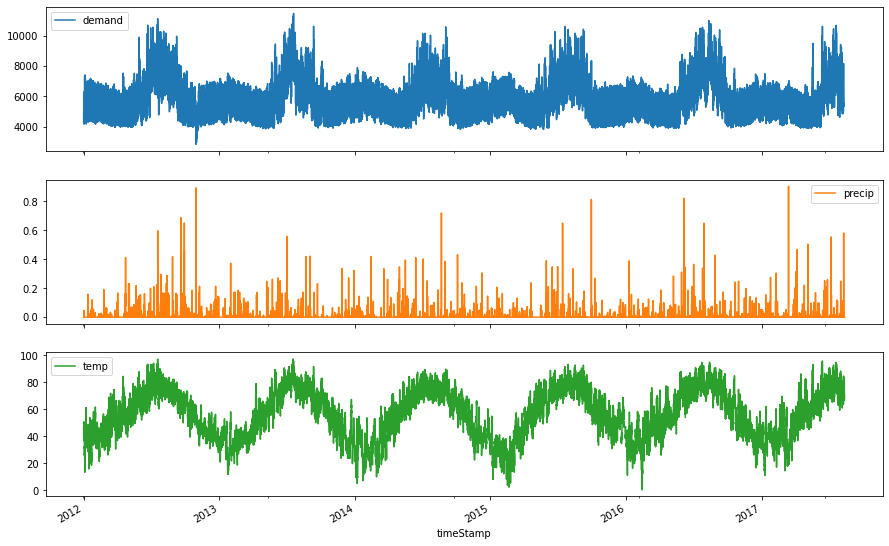

In [26]:
ny_df.plot(subplots=True)

In [27]:
ny_df_daily = ny_df.resample('D').mean()

In [28]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [29]:
from fbprophet import Prophet

In [30]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis='columns')


In [31]:
ny_df_final.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [32]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01')&(ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [33]:
train.shape, test.shape

((1947, 2), (104, 2))

In [34]:
test.head()

,ds,y
1947,2017-05-01,5417.231583
1948,2017-05-02,5697.950042
1949,2017-05-03,5354.628500
1950,2017-05-04,5235.704833
1951,2017-05-05,5358.639500


In [38]:
prophecy = Prophet(interval_width=0.95, yearly_seasonality=True)

In [39]:
prophecy.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
prophecy.params

{'beta': array([[-0.03458069, -0.0705141 ,  0.05760564,  0.04705875, -0.01406572,
         -0.005001  , -0.00386455, -0.00073737,  0.00242053, -0.00755783,
          0.00405203,  0.0048309 , -0.00789597, -0.00470246,  0.00701919,
         -0.00268503, -0.00127789,  0.00170614,  0.00035376, -0.00021813,
         -0.02824817,  0.0238519 ,  0.02062351,  0.00054815, -0.0049496 ,
         -0.00501087]]),
 'delta': array([[ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01,
         -1.12338365e-08,  2.80534300e-09,  1.62508765e-08,
         -5.22679734e-08, -1.16075049e-08, -1.53930702e-07,
         -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
         -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,
          5.85259548e-05, -1.05435640e-07, -8.71744213e-02,
         -4.32663939e-02, -6.02327178e-08,  2.83861158e-08,
          3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
          3.53863651e-07]]),
 'k': array([[0.08895525]]),
 'm': array([[0.59330417]]),
 'sigma_obs': array([

In [41]:
future = prophecy.make_future_dataframe(periods=104)
future.tail()


,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [42]:
forecast = prophecy.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7587.395330,6736.499729,8451.513450
2047,2017-08-09,7576.508802,6652.121002,8496.312257
2048,2017-08-10,7531.224521,6620.254654,8422.184468
2049,2017-08-11,7486.440569,6573.630866,8449.370197
2050,2017-08-12,6911.617225,5916.206815,7856.700708


In [43]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

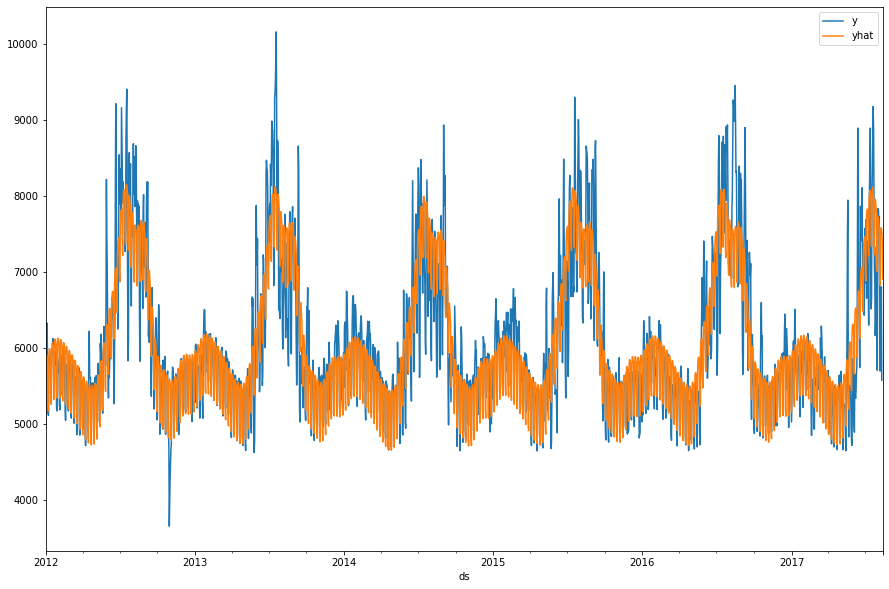

In [44]:
# Compare actual value y and predicted value yhat
pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

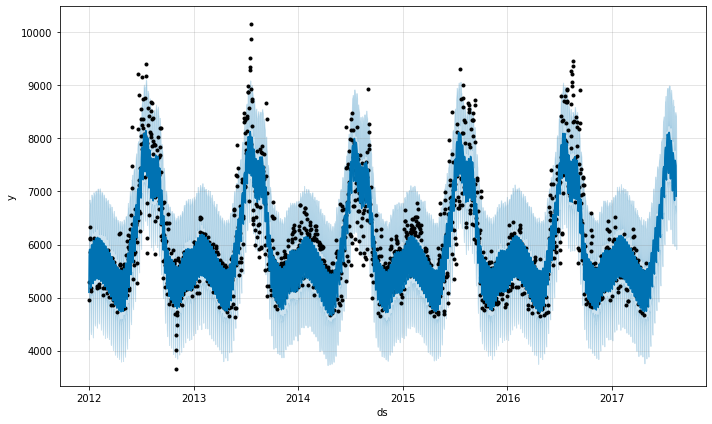

In [46]:
fig1 = prophecy.plot(forecast)

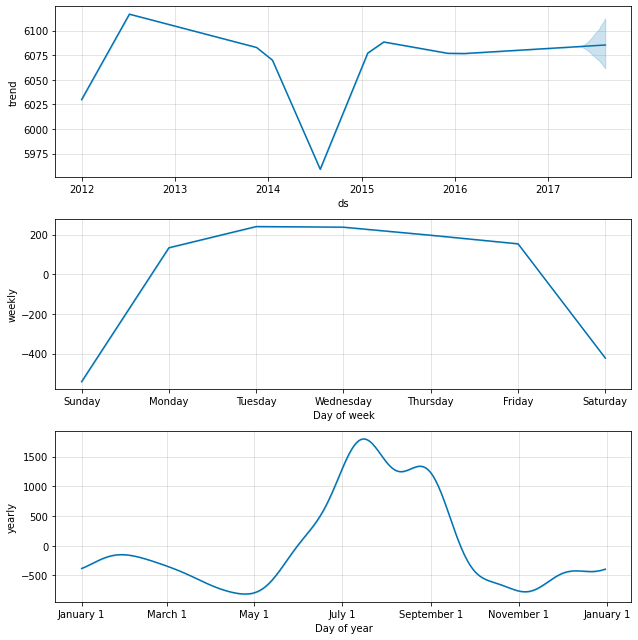

In [48]:
fig2 = prophecy.plot_components(forecast)